In [2]:
# Get quantmod
if (!require("quantmod")) {
  install.packages("quantmod")
  library(quantmod)
}

In [3]:
start <- as.Date("2016-01-01")
end <- as.Date("2016-10-01")

In [4]:
getSymbols("AAPL", src = "yahoo", from = start, to = end)

[1] "AAPL"

In [5]:
class(AAPL)

[1] "xts" "zoo"

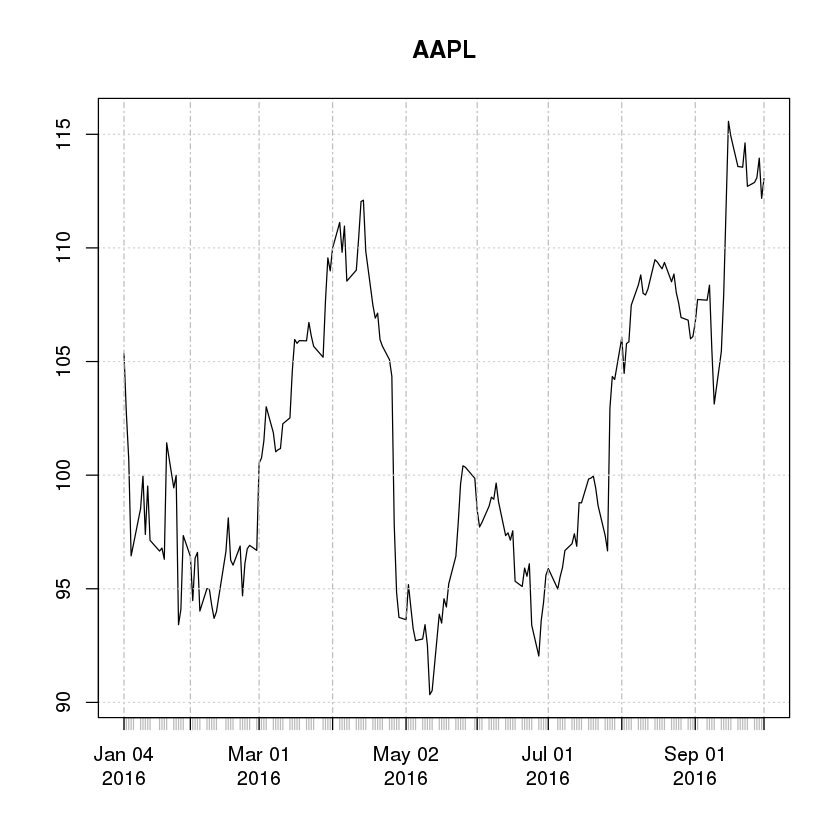

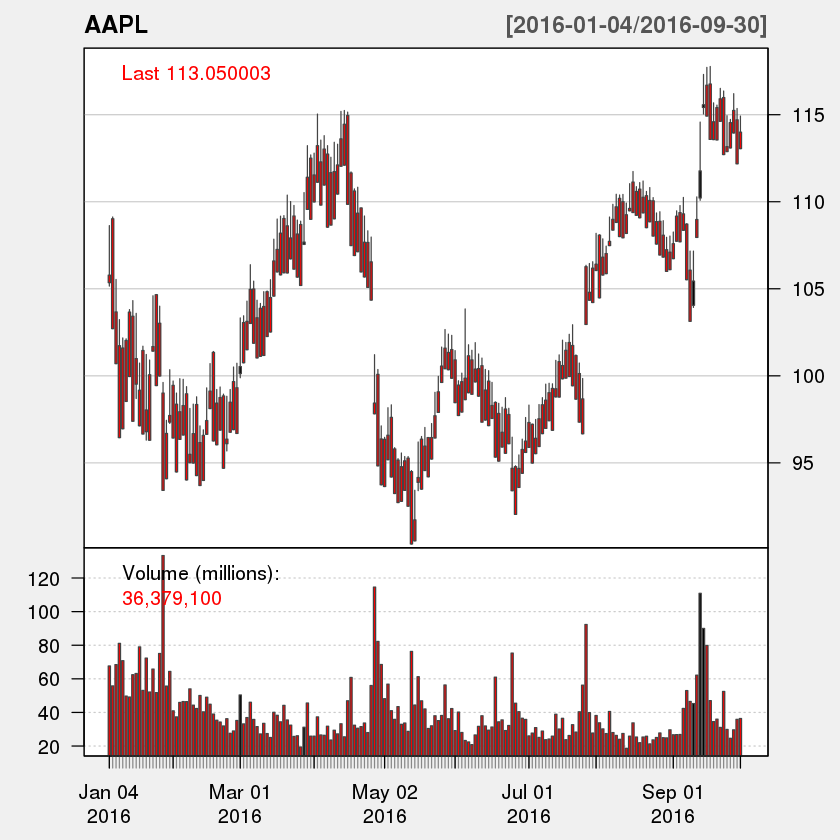

In [6]:
plot(AAPL[, "AAPL.Close"], main = "AAPL")
candleChart(AAPL, up.col = "black", dn.col = "red", theme = "white")

In [7]:
getSymbols(c("MSFT", "GOOG"), src = "yahoo", from = start, to = end)

[1] "MSFT" "GOOG"

In [8]:
stocks <- as.xts(data.frame(AAPL = AAPL[, "AAPL.Close"], MSFT = MSFT[, "MSFT.Close"], 
                            GOOG = GOOG[, "GOOG.Close"]))
head(stocks)

           AAPL.Close MSFT.Close GOOG.Close
2016-01-04     105.35      54.80     741.84
2016-01-05     102.71      55.05     742.58
2016-01-06     100.70      54.05     743.62
2016-01-07      96.45      52.17     726.39
2016-01-08      96.96      52.33     714.47
2016-01-11      98.53      52.30     716.03

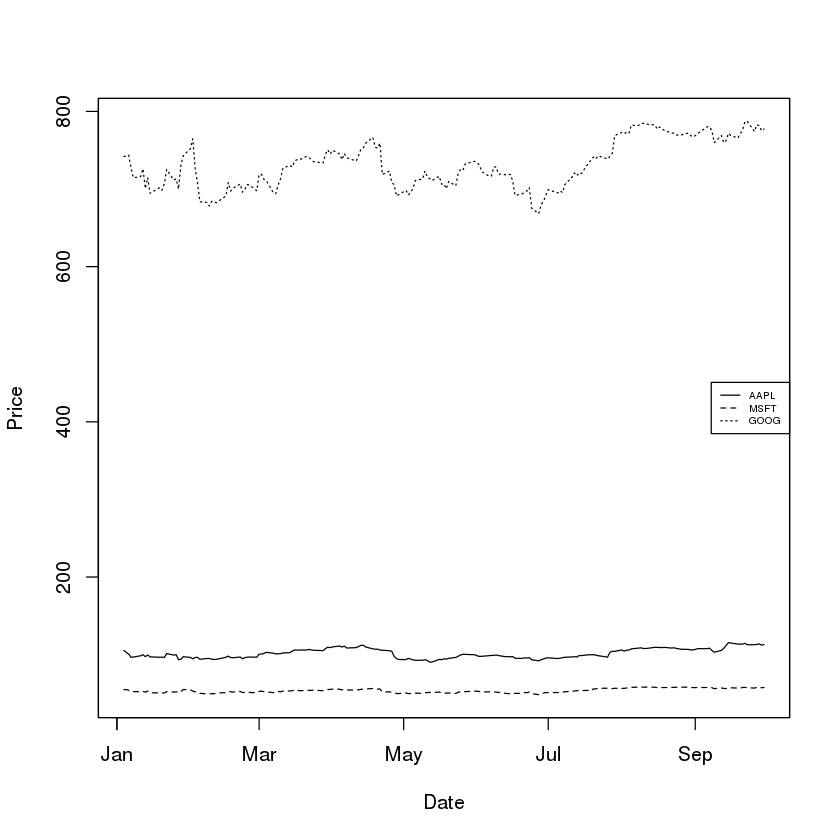

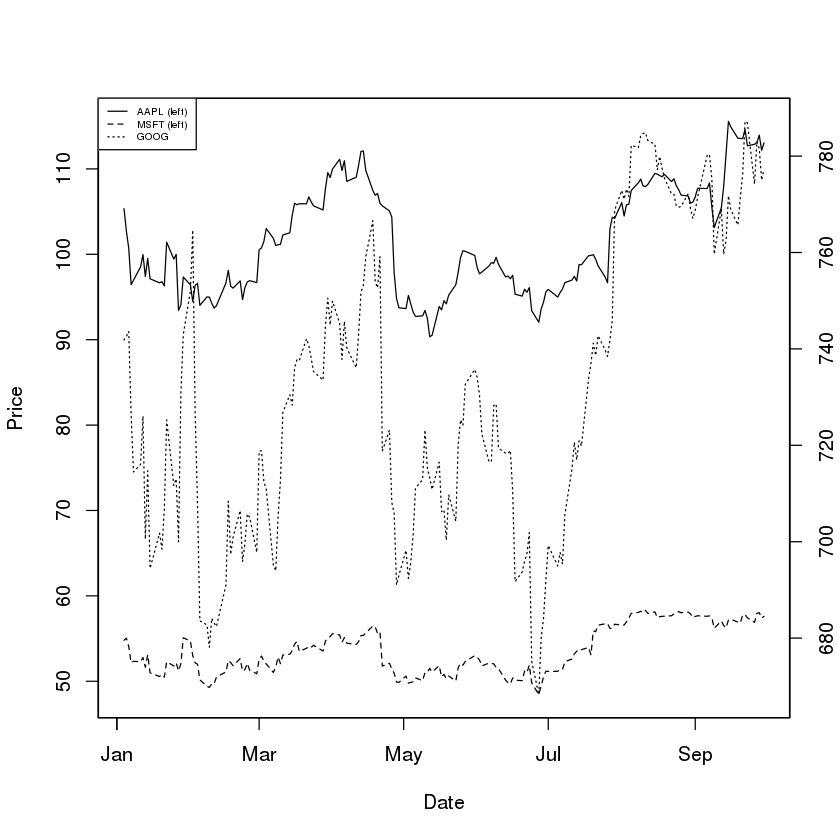

In [9]:
# Create a plot showing all series as lines; must use as.zoo to use the zoo
# method for plot, which allows for multiple series to be plotted on same
# plot
plot(as.zoo(stocks), screens = 1, lty = 1:3, xlab = "Date", ylab = "Price")
legend("right", c("AAPL", "MSFT", "GOOG"), lty = 1:3, cex = 0.5)

plot(as.zoo(stocks[, c("AAPL.Close", "MSFT.Close")]), screens = 1, lty = 1:2, 
     xlab = "Date", ylab = "Price")
par(new = TRUE)
plot(as.zoo(stocks[, "GOOG.Close"]), screens = 1, lty = 3, xaxt = "n", yaxt = "n", 
     xlab = "", ylab = "")
axis(4)
mtext("Price", side = 4, line = 3)
legend("topleft", c("AAPL (left)", "MSFT (left)", "GOOG"), lty = 1:3, cex = 0.5)

In [10]:
# Get me my beloved pipe operator!
if (!require("magrittr")) {
  install.packages("magrittr")
  library(magrittr)
}

Loading required package: magrittr


In [11]:
stock_return = apply(stocks, 1, function(x) {x / stocks[1,]}) %>% t %>% as.xts
head(stock_return)

           AAPL.Close MSFT.Close GOOG.Close
2016-01-04  1.0000000  1.0000000  1.0000000
2016-01-05  0.9749407  1.0045620  1.0009975
2016-01-06  0.9558614  0.9863139  1.0023994
2016-01-07  0.9155197  0.9520073  0.9791734
2016-01-08  0.9203607  0.9549271  0.9631052
2016-01-11  0.9352634  0.9543796  0.9652081

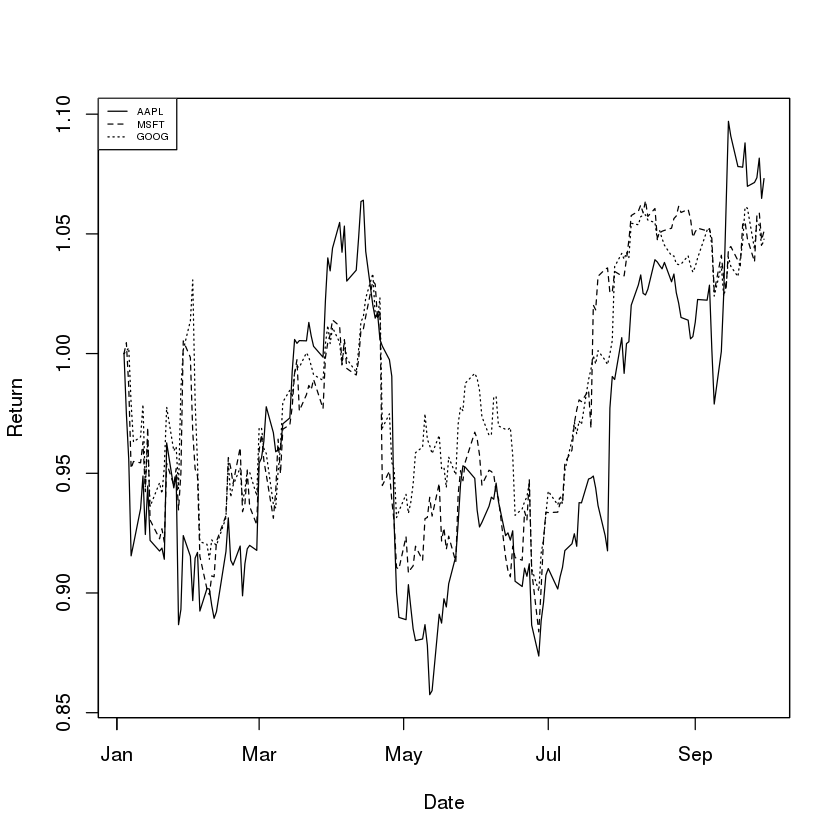

In [12]:
plot(as.zoo(stock_return), screens = 1, lty = 1:3, xlab = "Date", ylab = "Return")
legend("topleft", c("AAPL", "MSFT", "GOOG"), lty = 1:3, cex = 0.5)

In [13]:
stock_change = stocks %>% log %>% diff
head(stock_change)

             AAPL.Close    MSFT.Close   GOOG.Close
2016-01-04           NA            NA           NA
2016-01-05 -0.025378648  0.0045516693  0.000997009
2016-01-06 -0.019763704 -0.0183323194  0.001399513
2016-01-07 -0.043121062 -0.0354019469 -0.023443064
2016-01-08  0.005273804  0.0030622799 -0.016546113
2016-01-11  0.016062548 -0.0005735067  0.002181138

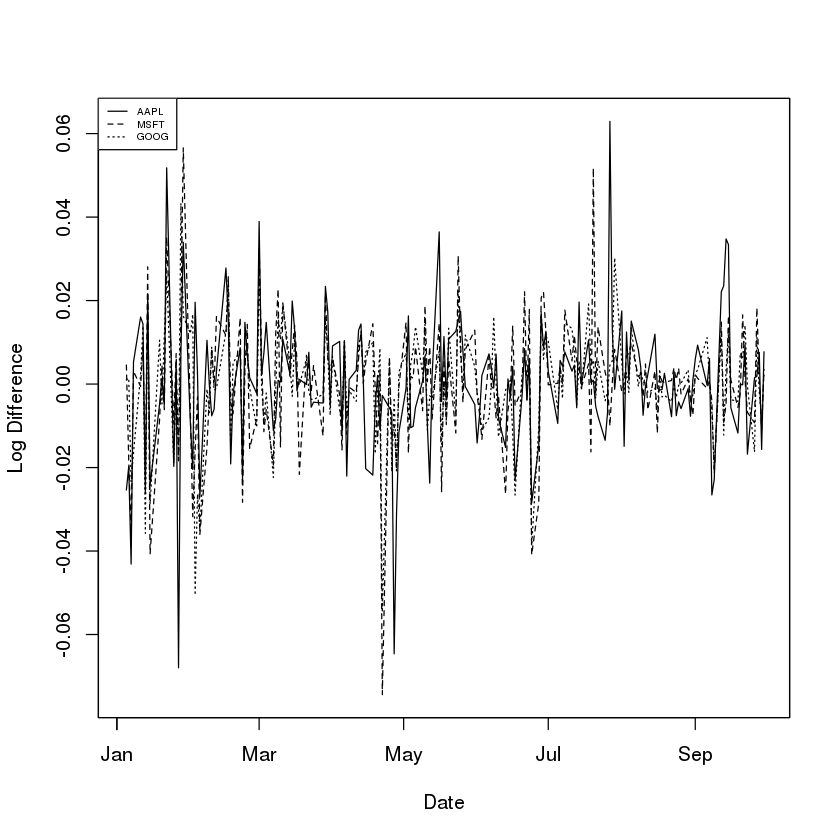

In [14]:
plot(as.zoo(stock_change), screens = 1, lty = 1:3, xlab = "Date", ylab = "Log Difference")
legend("topleft", c("AAPL", "MSFT", "GOOG"), lty = 1:3, cex = 0.5)

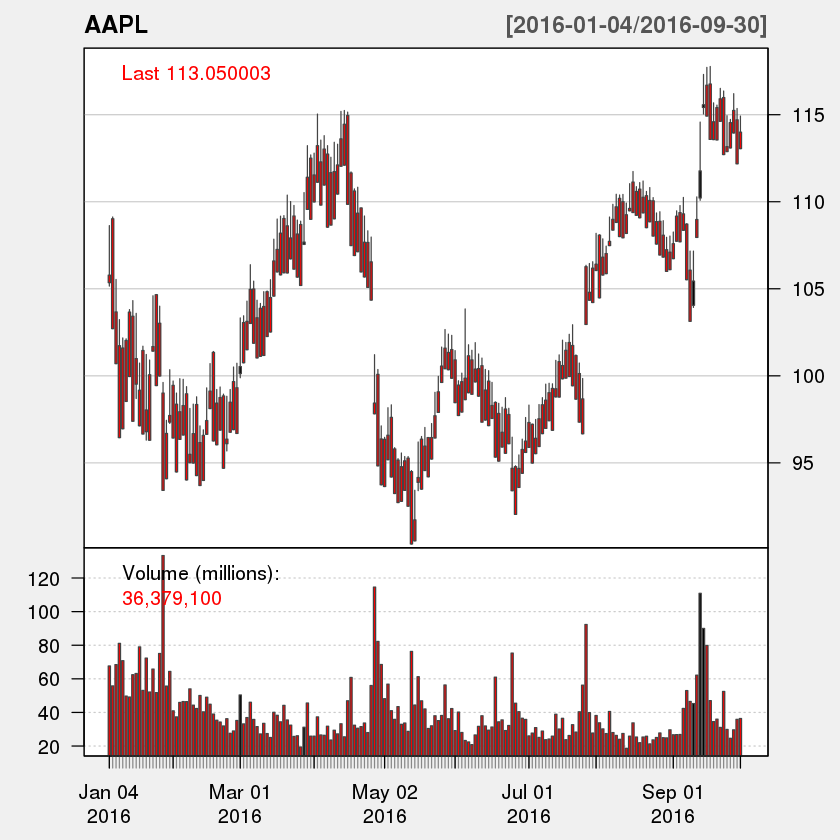

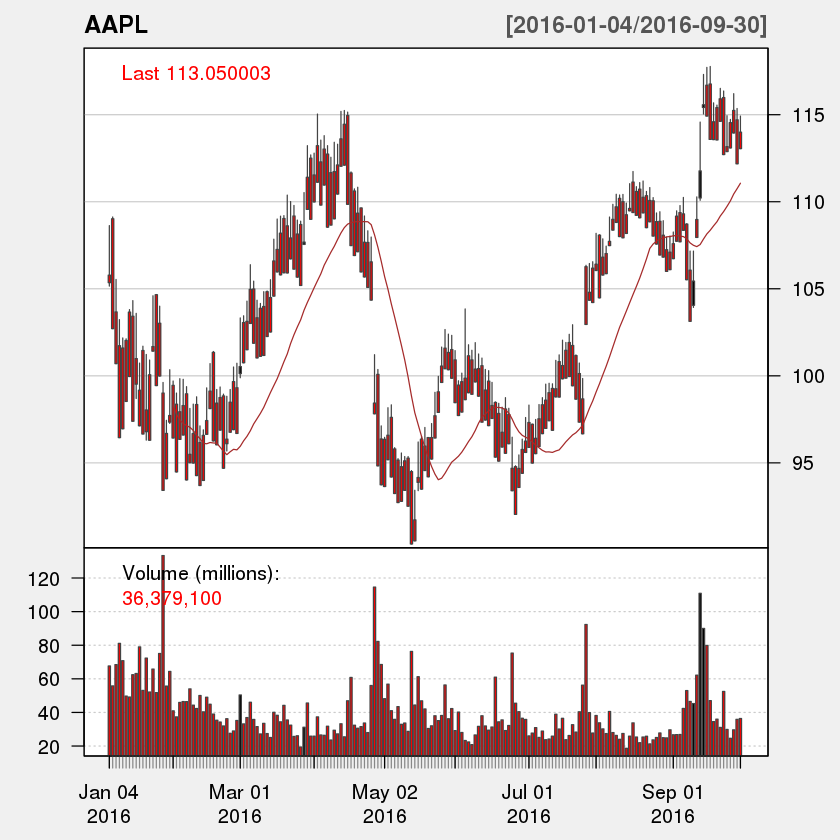

In [15]:
# Moving Average
candleChart(AAPL, up.col = "black", dn.col = "red", theme = "white")
addSMA(n = 20)

In [16]:
start = as.Date("2010-01-01")
getSymbols(c("AAPL", "MSFT", "GOOG"), src = "yahoo", from = start, to = end)

[1] "AAPL" "MSFT" "GOOG"

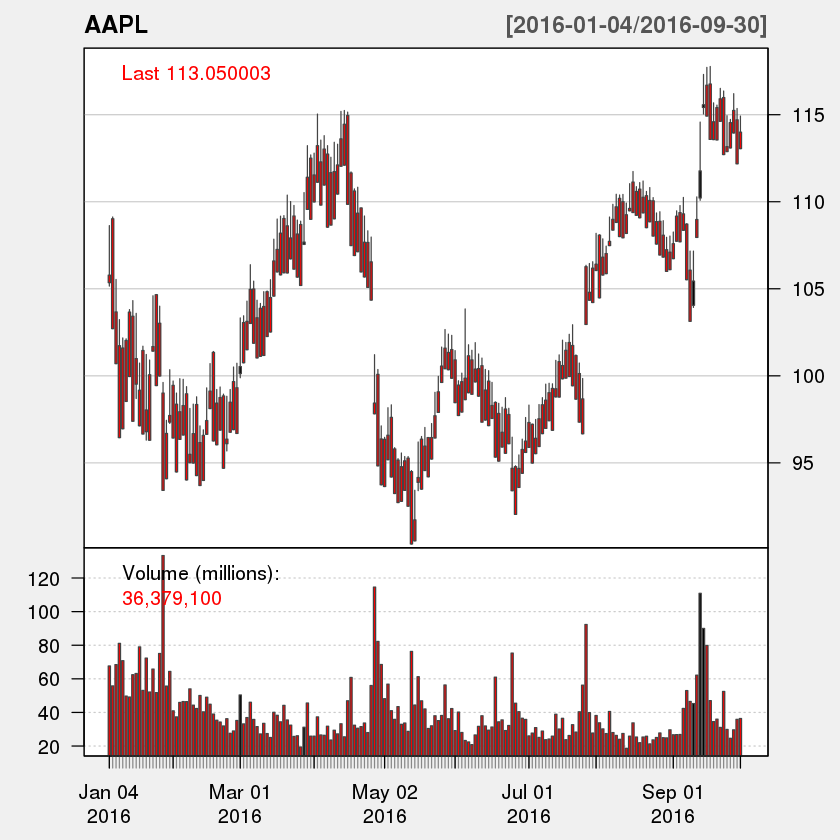

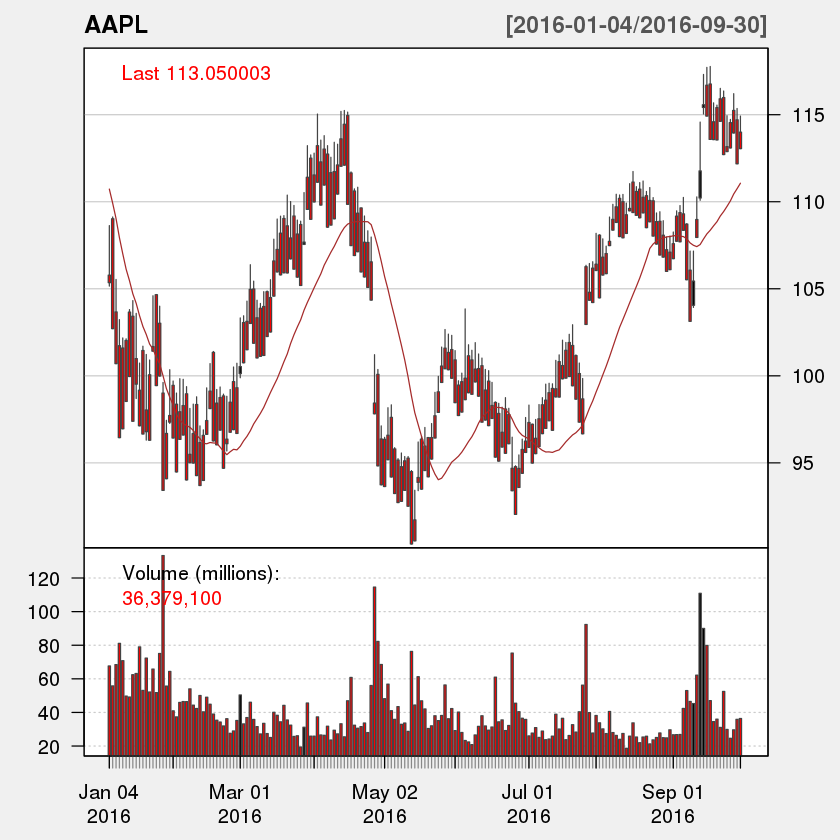

In [17]:
candleChart(AAPL, up.col = "black", dn.col = "red", theme = "white", subset = "2016-01-04/")
addSMA(n = 20)

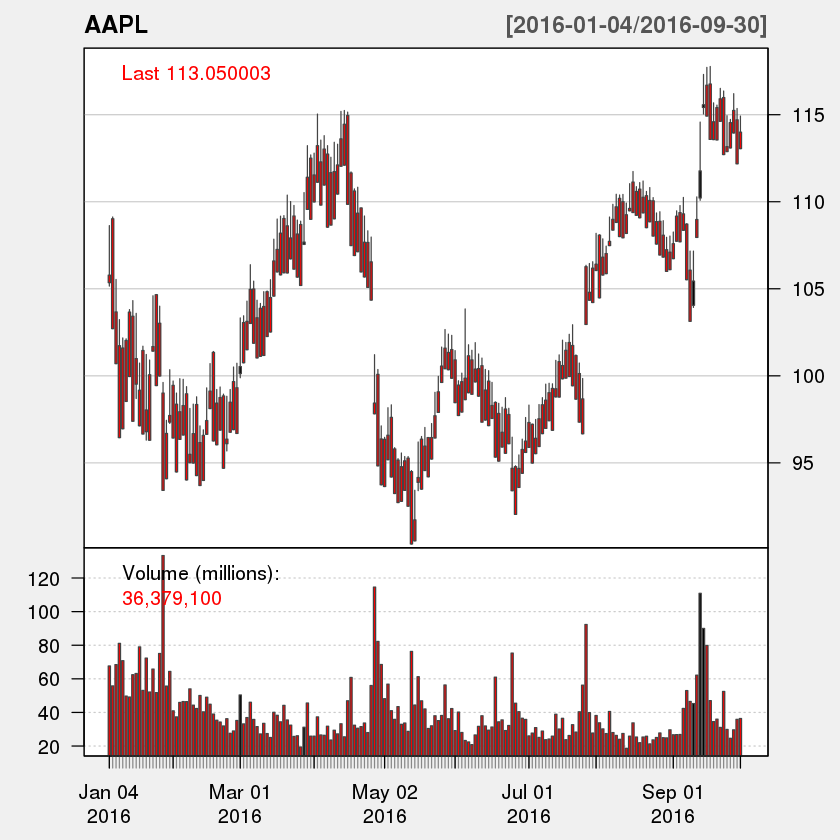

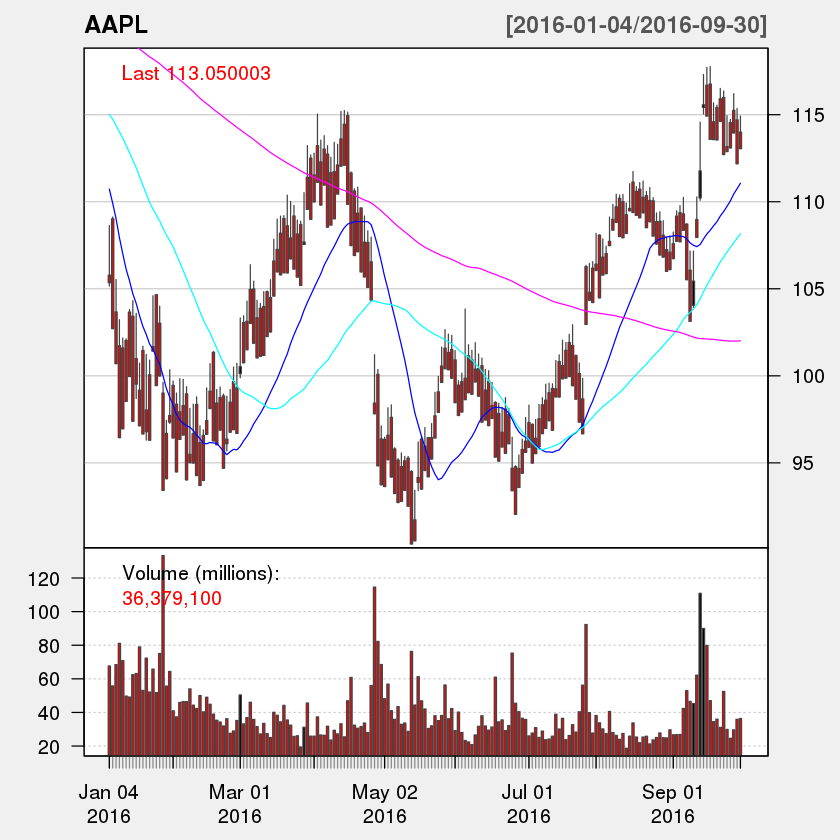

In [18]:
candleChart(AAPL, up.col = "black", dn.col = "red", theme = "white", subset = "2016-01-04/")
addSMA(n = c(20, 50, 200))